In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [51]:
plt.rcParams['figure.figsize'] = (12, 10)
plt.style.use('ggplot')

np.random.seed(42)

# Support Vector Machines

### Working through "_Hands-On Machine Learning with Scikit-Learn and Tensorflow_"

## What is an SVM?

> An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible
                                         
https://en.wikipedia.org/wiki/Support-vector_machine

This is the fundamental idea behind Support Vector Machines - separating the categories (classes, targets, etc.) as clearly as possible.

**Is Regression possible with an SVM?**

- Yes, however not directly. Support Vector Machines generate distances between data points within the hyperspace, and this distance can be used as a measure of confidence.

We'll Focus on _Classification_
- SVM $\rightarrow$ SVC

### How do SVMs work?

Rather than giving equal importance to all data points, SVM's are strongly influenced by data points which are close to the area (line or hyperplane) of separation. 

## Linear

Linear Classication with Support Vector Machines works well with data that is _Linearly Separable_.

![Linearly Separable](images/separating_hyperplanes.png)

https://en.wikipedia.org/wiki/Linear_separability

### Hard vs. Soft Margins

#### Generalizability and outlier tolerance

As stated above, SVMs are influenced by data that is close the separating line (or plane). These data are called _Support Vectors_. However, if the data has outliers and those outliers happen to be near that separation, they can have a debilitating effect on the model performance.

A _Hard Margin_:
>If the training data is linearly separable, we can select two parallel hyperplanes that separate the two classes of data, so that the distance between them is as large as possible.

https://en.wikipedia.org/wiki/Support-vector_machine#Hard-margin

### What if the data cannot be separated linearly or outliers are support vectors (are near the hyperplane)?

A _Soft Margin_:

Soft Margins are an extension of Hard Margins. The Soft Margins incorporate a loss function (_hinge loss_) as well as a regularization term

As the regularization term is reduced in magnitude, the model behavior approaches that of the Hard Margin
    
https://en.wikipedia.org/wiki/Support-vector_machine#Soft-margin

Depending on the classification task at hand, it might be advantageous to use different Margins even within in the same dataset. 

    Outliers? use soft margin
    Linearly separable? use hard margin

![margins](images/svm_margin.png)

https://en.wikipedia.org/wiki/Support-vector_machine#Soft-margin

## Non-Linear

Rather than applying a dot product between the model values and the data input, a non-linear SVM applies the _kernel trick_.

The goal of the kernel trick is to transform the original input space which is not linearly separable into a new, transformed space which is linearly separable (with a hyperplane).

**SVM with polynomial kernel visualization (Non-Linear Classification)** 

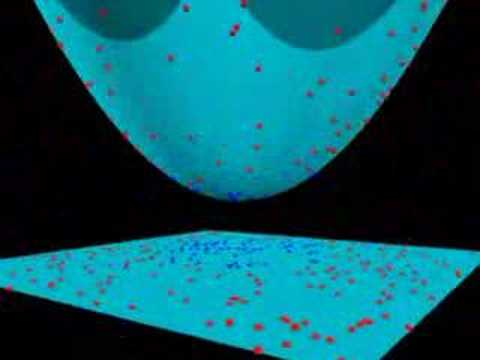

In [52]:
from IPython.display import YouTubeVideo
# https://youtu.be/3liCbRZPrZA
YouTubeVideo('3liCbRZPrZA', width=640, height=480)

https://youtu.be/3liCbRZPrZA

## Is there a difference in performance between a Linear and Non-Linear SVM Model?

![bias vs variance](images/bias_variance.png)

![noise and error](images/svc_linearsvc_errors.png)

The nonlinear basis function has higher variance. See how it is noisier than the linear kernel! The linear kernel has lower variance. See how it is less noisy!

    Now lets assess bias -

    Which kernel is more accurate? We can add the errors that you provided. 
    The nonlinear kernel has a total error of ~550+325=~875. The linear kernel 
    has an error of ~690+~50=~740. So the linear kernel seems to do better overall, 
    but they are pretty close overall. This is were things get tricky! 
    
https://datascience.stackexchange.com/a/9430

---

# Goal - Iris Species Identification

## Data

**Load the data from `sklearn`**

In [53]:
iris = datasets.load_iris()
feature_names = iris.feature_names
target_names = iris.target_names
target = iris.target

**Load the data from a local directory**

(Mine is located in the _data_ directory, within this repository)

In [54]:
## Source: https://archive.ics.uci.edu/ml/datasets/iris

class IrisDataset:
    """ Helper class for handling a local dataset similar to sklearn's `datasets.load_iris()`"""
    def __init__(self, data_path, features_path):
        self.data_path = data_path
        self.features_path = features_path
        
        temp_data = pd.read_csv(data_path, header=None)
        self.data = temp_data.drop([4], axis=1).values
        temp_targets = temp_data[4].map(lambda t: t.replace("Iris-", ""))
        self.target_names = ['setosa', 'versicolor', 'virginica']
        self.target = np.array([self.target_names.index(target)
                                for target in temp_targets.values])
        del temp_data
        self.feature_names = pd.read_csv(features_path, header=None).values.ravel()
        
# data_fname = 'iris.data'
# features_fname = 'iris.feature_names'
# data_path = os.path.join('data', data_fname)
# features_path = os.path.join('data', features_fname)
# iris = IrisDataset(data_path, features_path)

In [55]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [56]:
iris.feature_names

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], dtype=object)

In [57]:
iris.target_names

['setosa', 'versicolor', 'virginica']

In [58]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

---

## Features and Labels

In [59]:
f"Features: {iris.feature_names}"

"Features: ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'\n 'petal width (cm)']"

In [60]:
formatter = lambda label: "_".join(label.split(" ")[:-1])
formatted_labels = list(map(formatter, iris.feature_names))
formatted_labels

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [61]:
feature_ix = dict(zip(formatted_labels, range(len(formatted_labels))))
feature_ix

{'sepal_length': 0, 'sepal_width': 1, 'petal_length': 2, 'petal_width': 3}

In [62]:
ix_label = dict(zip(range(3), iris.target_names))
ix_label

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [63]:
label_ix = dict(zip(iris.target_names, range(3)))
label_ix

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [64]:
labels = [ix_label[i] for i in iris.target]

In [65]:
labels[30], labels[90], labels[110]

('setosa', 'versicolor', 'virginica')

In [66]:
target_index = pd.Series(iris.target, name='targets')
target_names = pd.Series(labels, name='target_names')
targets = pd.concat([target_index, target_names], axis=1)  # setosa, versiclor, virginica

data = pd.DataFrame(iris.data, columns=formatted_labels)

In [67]:
data.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

### Split the data for inspection and training

In [68]:
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105, 2), (45, 2))

In [69]:
df = X_train.copy()
df = df.join(y_train)
df = df.reset_index(drop=True)
df.head()

sepal_length  sepal_width  petal_length  petal_width  targets target_names
0           5.5          2.4           3.7          1.0        1   versicolor
1           6.3          2.8           5.1          1.5        2    virginica
2           6.4          3.1           5.5          1.8        2    virginica
3           6.6          3.0           4.4          1.4        1   versicolor
4           7.2          3.6           6.1          2.5        2    virginica

---

## Visualize

In [70]:
def plot_features(feature_x, feature_y):
    """ Plot features from the `df` dataframe """
    global df
    colors = ['blue', 'yellow','purple']
    for c, name in zip(colors, df.target_names.unique()):
        plt.scatter(df[df.target_names==name][feature_x], 
                    df[df.target_names==name][feature_y],
                    color=c,
                    label=name)
        
    plt.xlabel(feature_x.capitalize())
    plt.ylabel(feature_y.capitalize())
    plt.legend()

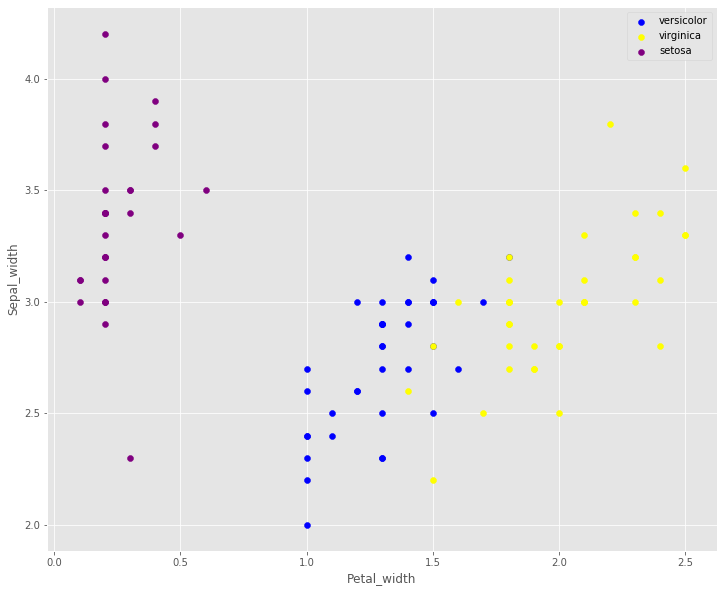

In [71]:
plot_features('petal_width', 'sepal_width')

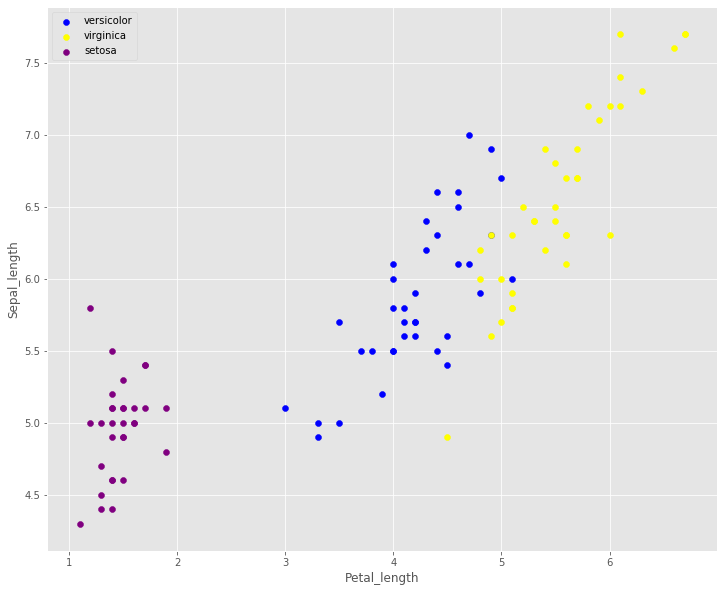

In [72]:
plot_features('petal_length', 'sepal_length')

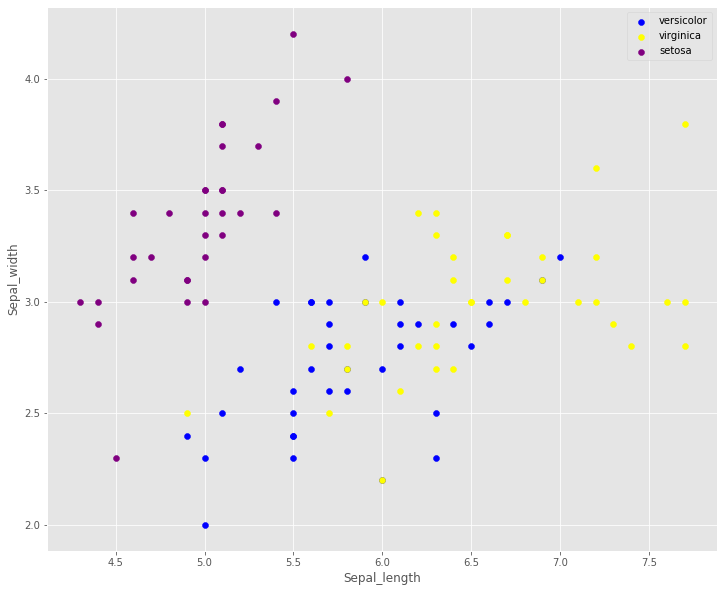

In [73]:
plot_features('sepal_length', 'sepal_width')

## Data/Model Pipeline

> ...The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

In [74]:
C = 1
linear_svc = Pipeline((
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=C, max_iter=5000))
))

svc = Pipeline((
        ('scaler', StandardScaler()),
        ("svc", SVC(C=C, max_iter=5000))
))

### _Standard Scaler_
> Standardize features by removing the mean and scaling to unit variance. 
    
The standard score of a sample x is calculated as:

$ z = \frac{(x - \mu)}{\sigma}$

where $\mu$ is the mean and $\sigma$ is the standard deviation

_What if the units weren't the same (m vs. cm)? Would they have an effect on the SVM model?_

**Is it necessary or advantageous to scale features when using a SVM?**

https://stats.stackexchange.com/questions/154224/when-using-svms-why-do-i-need-to-scale-the-features

---

## Training

In [75]:
linear_svc.fit(X_train.values, y_train.targets)
svc.fit(X_train.values, y_train.targets)
None

In [76]:
linear_svc

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=5000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [77]:
svc

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=5000,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

## Predicting

In [78]:
linear_svc.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0,
       0])

In [79]:
svc.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [80]:
f"Linear SVC Pipeline score: {linear_svc.score(X_test, y_test.targets):.2%}"

'Linear SVC Pipeline score: 95.56%'

In [81]:
f"SVC Pipeline score: {svc.score(X_test, y_test.targets):.2%}"

'SVC Pipeline score: 100.00%'

---

In [82]:
def plot_decision(trained_model, colA, colB):
    global X_test
    global y_test
    global label_ix
    
    # https://gist.github.com/anandology/772d44d291a9daa198d4
    h = 0.2 # Step size of the mesh.
    x_min, x_max = X_test.values[:, colA].min() - 1, X_test.values[:, colA].max() + 1
    y_min, y_max = X_test.values[:, colB].min() - 1, X_test.values[:, colB].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    # model.fit(X_train[:, [colA, colB]], y_train)
    Z = trained_model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X_test.values[:, colA].min() - 1, X_test.values[:, colA].max() + 1
    y_min, y_max = X_test.values[:, colB].min() - 1, X_test.values[:, colB].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = trained_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    
    colors = ['blue', 'purple','yellow']
    for c, name in zip(colors, y_test.target_names):
        ix = np.where(y_test.targets == label_ix[name])
        plt.scatter(X_test.values[ix, colA], 
                    X_test.values[ix, colB],
                    label=name,
                    color=c,
                    alpha=0.8)
        
    plt.xlabel(iris.feature_names[colA].capitalize())
    plt.ylabel(iris.feature_names[colB].capitalize())
    plt.legend()
    None

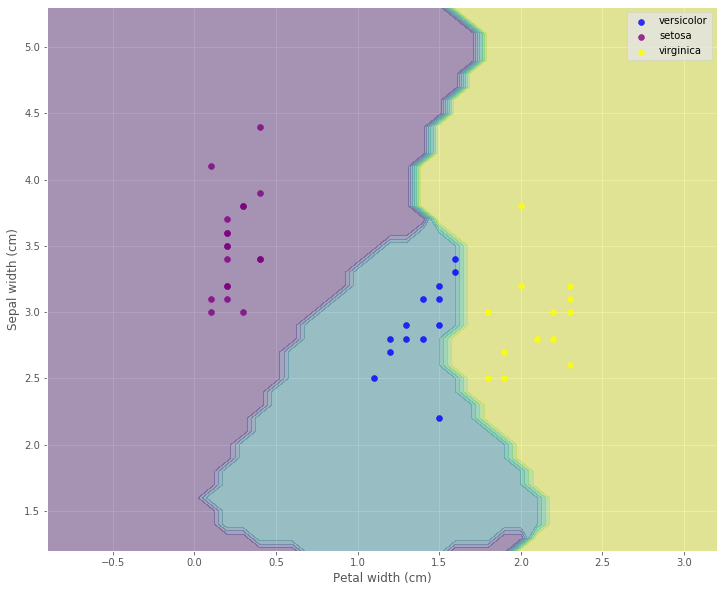

In [83]:
clf = svc
featureA, featureB = 'petal_width', 'sepal_width'
colA, colB = feature_ix[featureA], feature_ix[featureB]

clf.fit(X_train.values[:, [colA, colB]], y_train.targets)
plot_decision(clf, colA, colB)

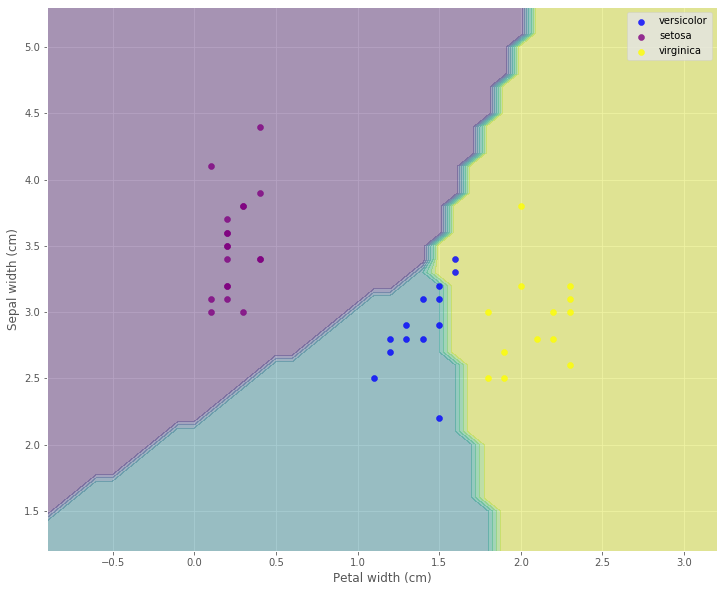

In [84]:
clf = linear_svc
clf.fit(X_train.values[:, [colA, colB]], y_train.targets)
plot_decision(clf, colA, colB)

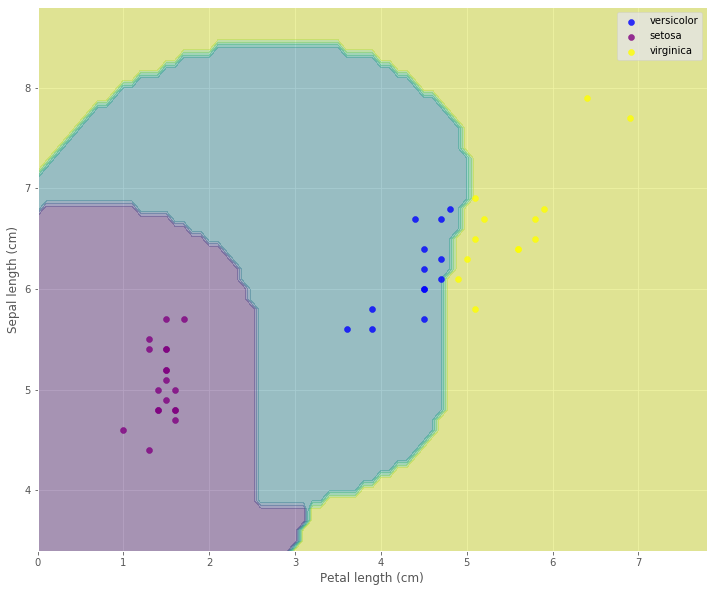

In [85]:
clf = svc
featureA, featureB = 'petal_length', 'sepal_length'
colA, colB = feature_ix[featureA], feature_ix[featureB]

clf.fit(X_train.values[:, [colA, colB]], y_train.targets)
plot_decision(clf, colA, colB)

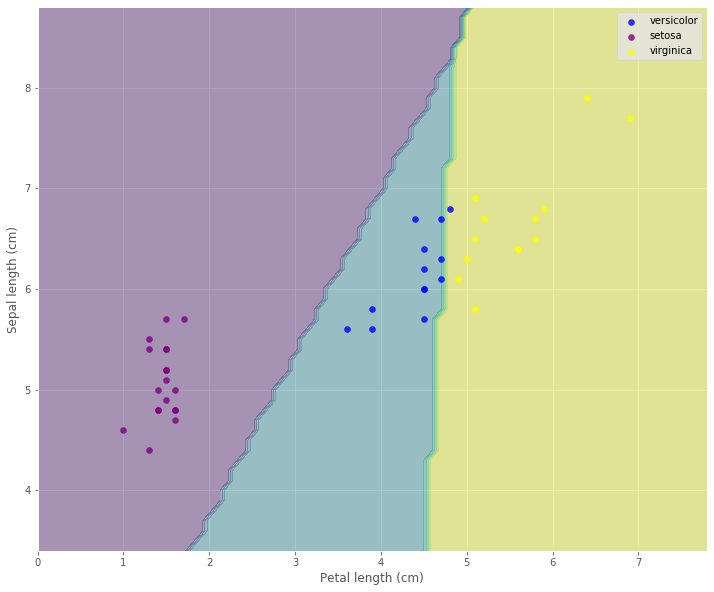

In [86]:
clf = linear_svc
clf.fit(X_train.values[:, [colA, colB]], y_train.targets)
plot_decision(clf, colA, colB)

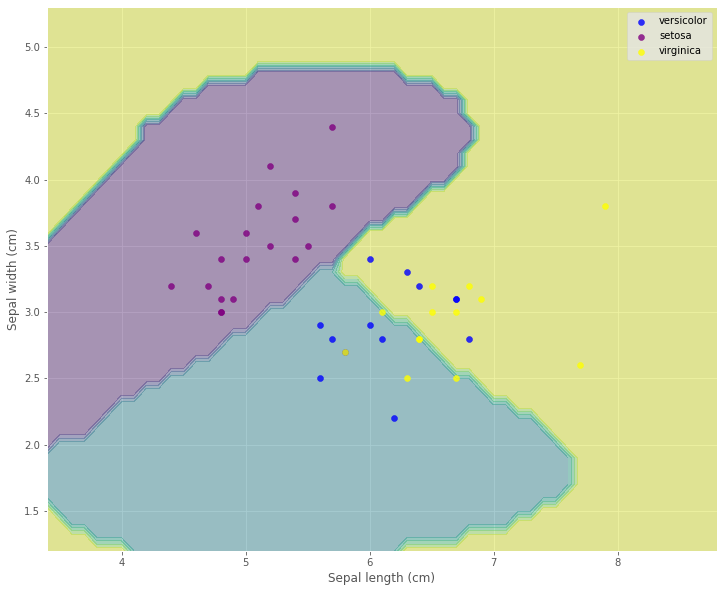

In [87]:
clf = svc
featureA, featureB = 'sepal_length', 'sepal_width'
colA, colB = feature_ix[featureA], feature_ix[featureB]

clf.fit(X_train.values[:, [colA, colB]], y_train.targets)
plot_decision(clf, colA, colB)

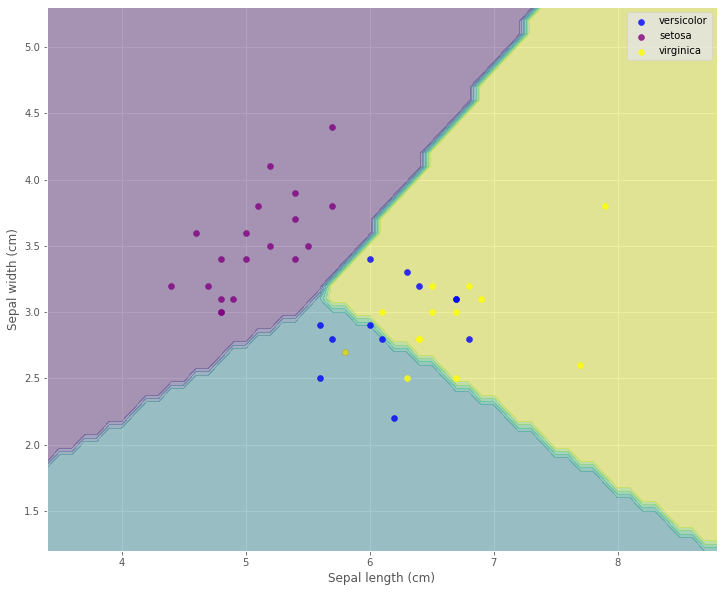

In [88]:
clf = linear_svc
clf.fit(X_train.values[:, [colA, colB]], y_train.targets)
plot_decision(clf, colA, colB)

## Adding Features to enable linear separation in a non-linear task
## An extra example - work in progress

In [89]:
from sklearn.preprocessing import PolynomialFeatures

svc = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, max_iter=10000))
))

poly_svc = Pipeline((
    ("poly_features", PolynomialFeatures(degree=2)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, max_iter=10000))
))


In [90]:
svc.fit(X_train.values, y_train.targets)
poly_svc.fit(X_train.values, y_train.targets)
None

In [91]:
svc.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [92]:
poly_svc.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [93]:
f"Linear SVC without Polynomial Features Pipeline score: {svc.score(X_test.values, y_test.targets):.2%}"

'Linear SVC without Polynomial Features Pipeline score: 100.00%'

In [94]:
f"Linear SVC with Polynomial Features Pipeline score: {poly_svc.score(X_test.values, y_test.targets):.2%}"

'Linear SVC with Polynomial Features Pipeline score: 100.00%'

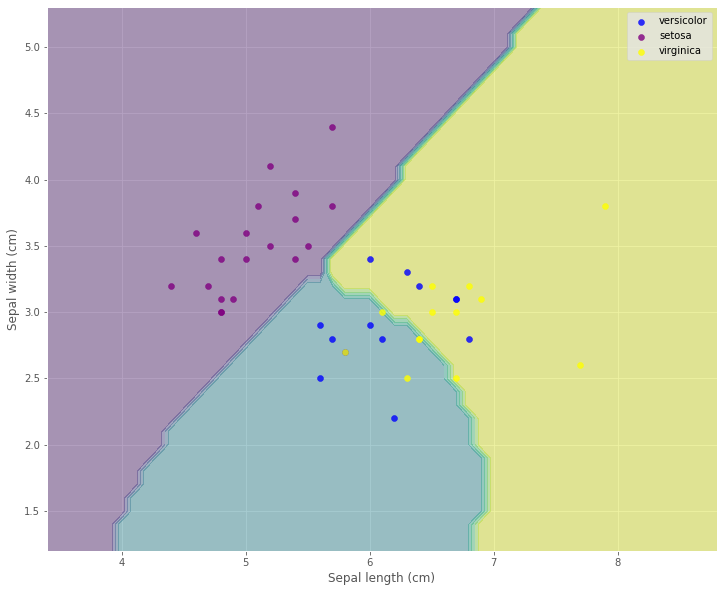

In [95]:
featureA, featureB = 'sepal_length', 'sepal_width'
colA, colB = feature_ix[featureA], feature_ix[featureB]

poly_svc.fit(X_train.values[:, [colA, colB]], y_train.targets)

plot_decision(poly_svc, colA, colB)

### Using different kernels for Non-Linear tasks

In [96]:
rbf_kernel_svc = Pipeline((
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=5, C=1))
))

rbf_kernel_svc.fit(X_train.values, y_train.targets)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

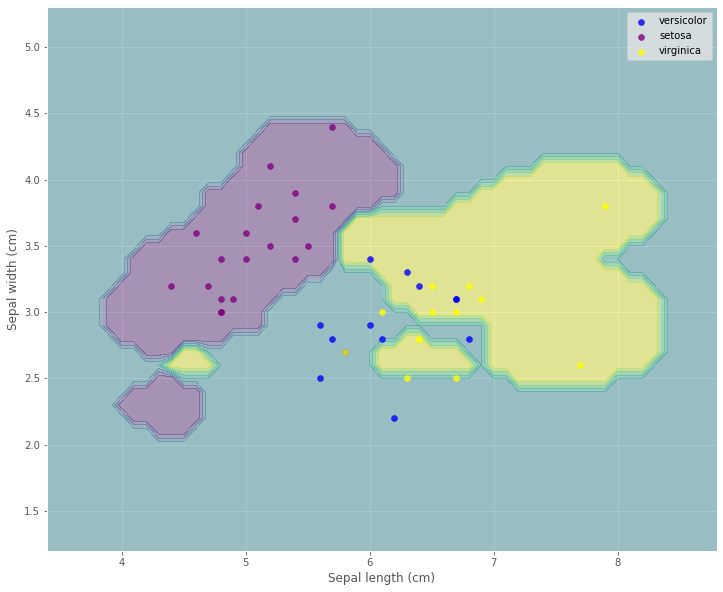

In [97]:
featureA, featureB = 'sepal_length', 'sepal_width'
colA, colB = feature_ix[featureA], feature_ix[featureB]

rbf_kernel_svc.fit(X_train.values[:, [colA, colB]], y_train.targets)

plot_decision(rbf_kernel_svc, colA, colB)

---

## Take this notebook further!

### Come up with better models for creating better classifiers (especially in the difficult areas where the species' values overlap)

---

References and further reading:
    
https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf